In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 

In [50]:
df=pd.read_csv('/dshome/WoongLab/heo/construction_oil/heartdisease/heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [51]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [52]:
df.shape

(253680, 22)

In [53]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [54]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


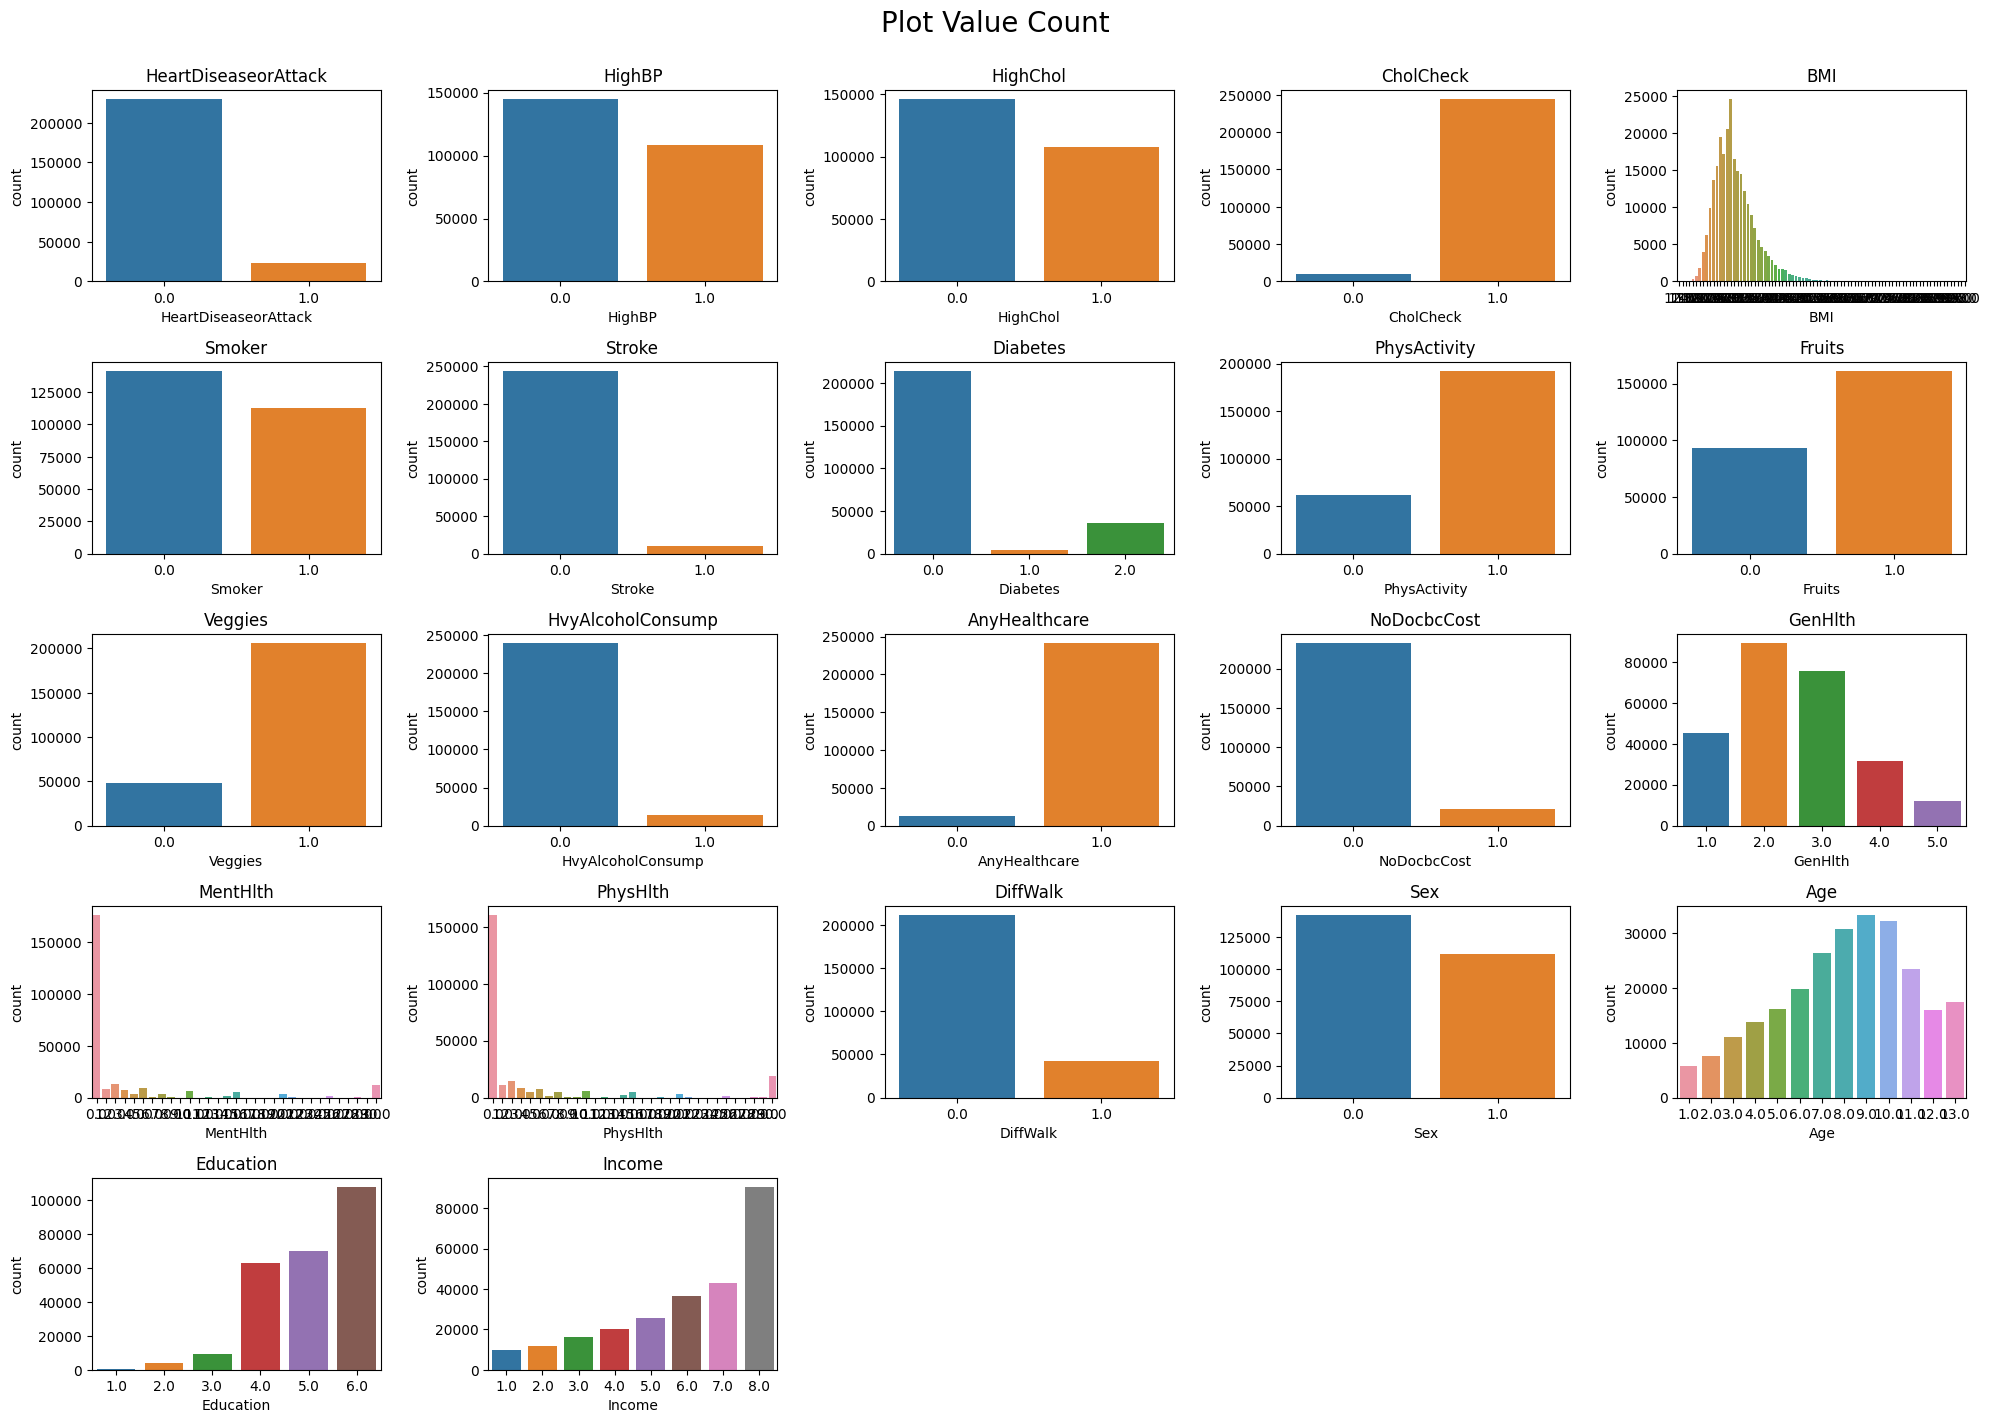

In [55]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [57]:
# Separate into target, binary, categorical and numerical features
target = ['HeartDiseaseorAttack']
bin_features = ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke','PhysActivity', 'Fruits', 'Veggies', 
                'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
cat_features = ['Diabetes', 'GenHlth', 'Education','Income']
num_features = ['BMI','MentHlth', 'PhysHlth', 'Age']

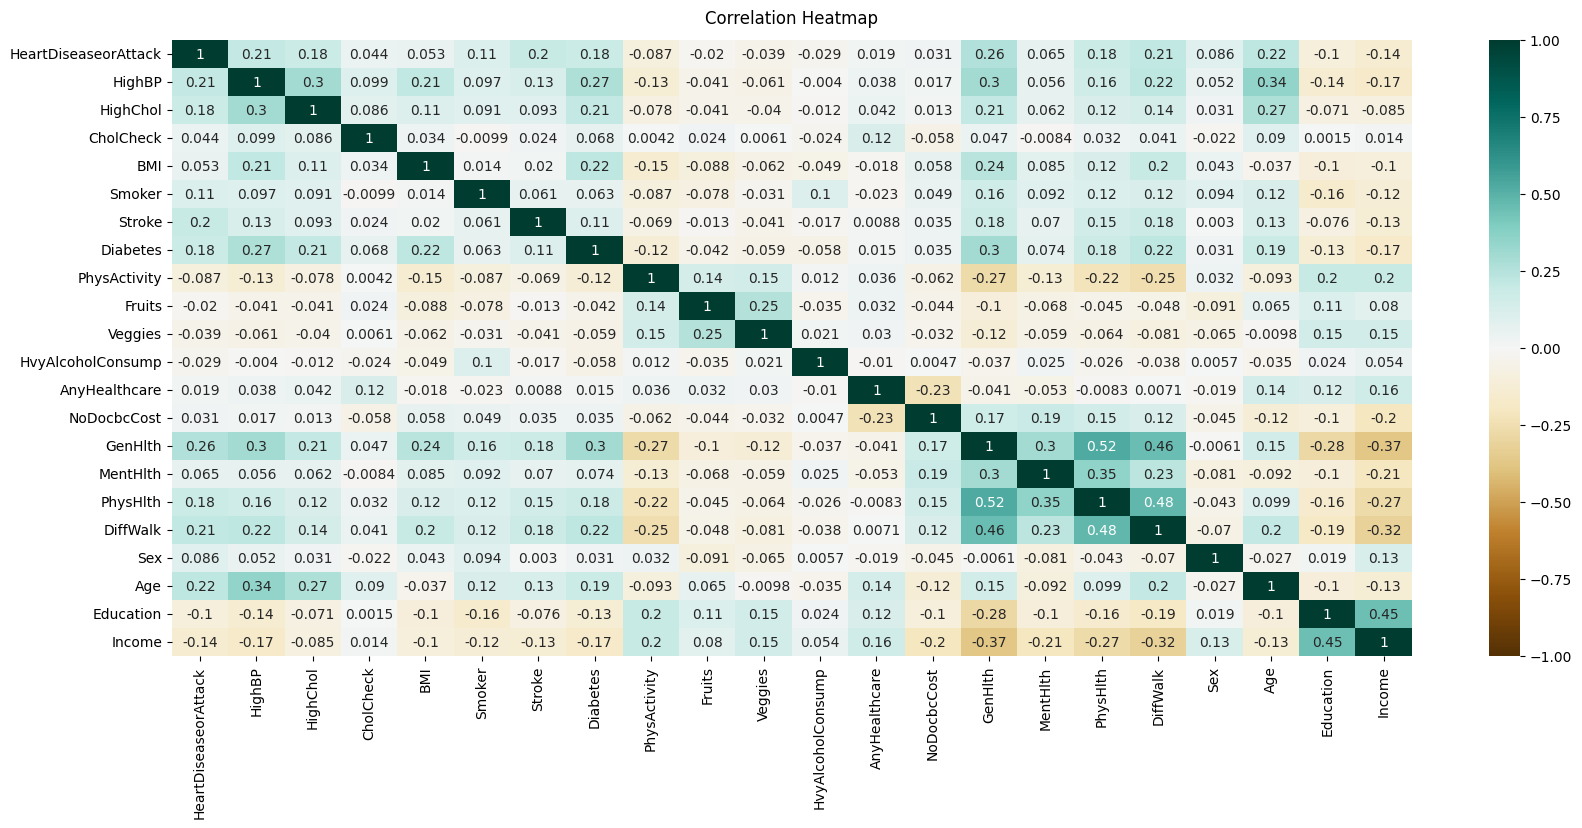

In [58]:
# Explore corrleations between features
plt.figure(figsize=(20,8))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [59]:
all_X=df.drop(['HeartDiseaseorAttack'],axis=1) 
all_y=df['HeartDiseaseorAttack']

In [60]:
le = LabelEncoder()
for col in cat_features:    
    all_X[col] = le.fit_transform(all_X[col])

In [61]:
forest = RandomForestClassifier(random_state=42,max_depth=10)

In [62]:
forest.fit(all_X,all_y)

RandomForestClassifier(max_depth=10, random_state=42)

In [63]:
# 변수 중요도를 계산합니다.

importances=forest.feature_importances_

In [64]:
# 변수 중요도가 높은 것부터 차례로 정렬합니다.

indices=np.argsort(importances)[::-1]

In [65]:
print("Feature ranking:")
for f in range(all_X.shape[1]):
    print("%d. %s (%f)" % (f + 1, all_X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. GenHlth (0.193800)
2. Age (0.157180)
3. Stroke (0.112521)
4. HighBP (0.101875)
5. DiffWalk (0.073257)
6. HighChol (0.070616)
7. PhysHlth (0.050766)
8. Sex (0.048900)
9. Diabetes (0.045987)
10. BMI (0.029662)
11. Income (0.028621)
12. Smoker (0.026478)
13. MentHlth (0.015929)
14. Education (0.014907)
15. PhysActivity (0.006171)
16. NoDocbcCost (0.005108)
17. Fruits (0.004589)
18. Veggies (0.004561)
19. AnyHealthcare (0.003358)
20. HvyAlcoholConsump (0.003028)
21. CholCheck (0.002688)


In [66]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

In [67]:
train_data=pd.concat([train_X,train_y],axis=1)
test_data=pd.concat([test_X,test_y],axis=1)

In [68]:
train_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/heart_train_data.csv',index=False)

test_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/heart_test_data.csv',index=False)